In [ ]:
!pip install requests pandas matplotlib folium
import requests, pandas as pd, matplotlib.pyplot as plt, folium

In [ ]:
lat, lon = 43.7315, -79.7624  # Brampton, ON

In [ ]:
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": lat,
    "longitude": lon,
    "hourly": "temperature_2m",
    "forecast_days": 7,
    "timezone": "America/Toronto"
}
r = requests.get(url, params=params)
data = r.json()

In [ ]:
 df = pd.DataFrame({
    "time": data["hourly"]["time"],
    "temp_C": data["hourly"]["temperature_2m"]
})
df["time"] = pd.to_datetime(df["time"])
df.head()

,time,temp_C
0,2025-11-08 00:00:00,7.3
1,2025-11-08 01:00:00,6.3
2,2025-11-08 02:00:00,5.3
3,2025-11-08 03:00:00,4.4
4,2025-11-08 04:00:00,4.1


In [ ]:
daily = df.resample('D', on='time').agg({'temp_C': ['min', 'max']})
daily.columns = ['tmin', 'tmax']

In [ ]:
daily['freeze_thaw'] = (daily['tmin'] < 0) & (daily['tmax'] > 2)

In [ ]:
daily['ft_3day'] = daily['freeze_thaw'].rolling(3).sum()
daily['start'] = (daily['ft_3day'] == 3) & (daily['ft_3day'].shift(1) < 3)

In [ ]:
daily.tail()

,tmin,tmax,freeze_thaw,ft_3day,start
time,,,,,
2025-11-10,-7.5,-1.5,False,0.0,False
2025-11-11,-8.3,1.5,False,0.0,False
2025-11-12,-0.4,3.6,True,1.0,False
2025-11-13,0.6,5.2,False,1.0,False
2025-11-14,-2.5,2.5,True,2.0,False


In [ ]:
if daily['start'].any():
    date = daily[daily['start']].index[-1].strftime('%Y-%m-%d')
    print(f"🌳 ALERT: Ideal freeze-thaw cycle begins around {date}. Start tapping soon!")
else:
    print("❄️ No freeze-thaw window yet — keep monitoring.")

❄️ No freeze-thaw window yet — keep monitoring.


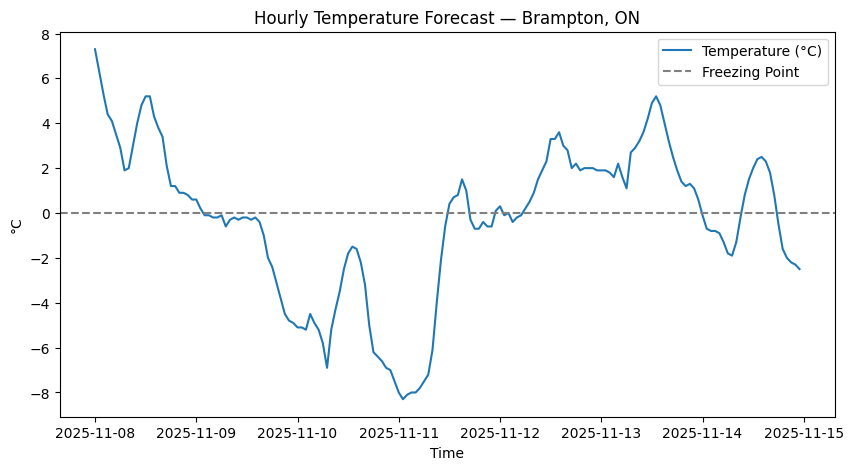

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df["time"], df["temp_C"], label="Temperature (°C)")
plt.axhline(0, color="gray", linestyle="--", label="Freezing Point")
plt.title("Hourly Temperature Forecast — Brampton, ON")
plt.xlabel("Time"); plt.ylabel("°C")
plt.legend()
plt.show()

In [ ]:
# Check if freeze-thaw window exists
if daily['start'].any():
    latest = daily[daily['start']].index[-1].strftime("%Y-%m-%d")
    print(f"🌳 ALERT: Ideal freeze–thaw cycle begins around {latest}. Start tapping soon!")
else:
    print("❄️ No freeze–thaw window yet — keep monitoring daily.")

❄️ No freeze–thaw window yet — keep monitoring daily.


In [ ]:
!pip install twilio
import os
from twilio.rest import Client

os.environ["TWILIO_SID"] = "AC88c0970d94030fd64a5dcb054f150e8e"
os.environ["TWILIO_TOKEN"] = "8f05e7acf3f97910be57351ba90dca13"

account_sid = os.getenv("TWILIO_SID")
auth_token = os.getenv("TWILIO_TOKEN")

client = Client(account_sid, auth_token)

if daily['start'].any():
    latest = daily[daily['start']].index[-1].strftime("%Y-%m-%d")
    message = client.messages.create(
        body=f"🌳 Maple Syrup Alert: Ideal freeze–thaw window begins around {latest}!",
        from_="+19472255115",   # Twilio trial number
        to="+6474690248"
    )
    print("📱 SMS sent successfully!")
else:
    print("No freeze–thaw cycle yet — SMS not sent.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.9 MB/s eta 0:00:00
No freeze–thaw cycle yet — SMS not sent.
